<a href="https://colab.research.google.com/github/najjouj/Birella/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [5]:
rand=np.random.RandomState(42)

X=rand.rand(10,2)
X.shape

(10, 2)

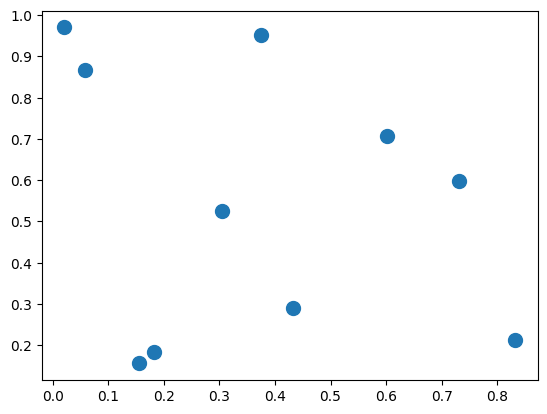

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], s=100)

In [8]:
dist_sq=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=1)
dist_sq.shape

(10, 2)

For each pair of points, compute differences in their coordinates

In [10]:
differences=X[:,np.newaxis,:] - X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

Square the coordinate differences

In [11]:
sq_difference=differences**2
sq_difference.shape

(10, 10, 2)

Sum the coordinate differences to get the squared distance

In [12]:
dist_sq=sq_difference.sum(-1)
dist_sq.shape

(10, 10)

In [13]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
nearest=np.argsort(dist_sq,axis=1)
nearest

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

In [26]:
k=2
nearest_partition=np.argpartition(dist_sq,k+1,axis=1)
nearest_partition

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

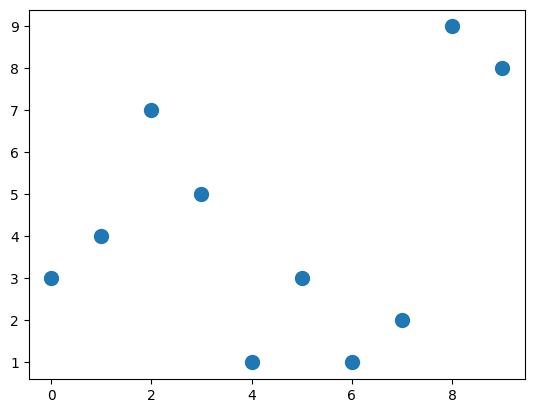

In [27]:
plt.scatter(nearest_partition[:,0],nearest_partition[:,1], s=100)

Draw lines from each point to its two nearest neighbors

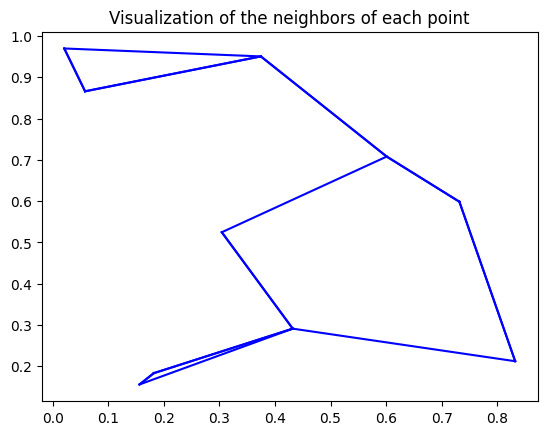

In [28]:
k=2
for i in range (X.shape[0]):
  for j in nearest_partition[i,:k+1]:
    #plot a line from X[i] to X[j]
    #use some zip magic to make it happen:
    plt.plot(*zip(X[j],X[i]),color='blue')
    plt.title('Visualization of the neighbors of each point')